In [304]:
from scipy.linalg import lstsq
import numpy as np
import pandas as pd
import requests
from urllib import request as rq
import matplotlib.pyplot as plt

In [305]:
link = 'https://data.rgj.com/election-results/race/nv-president-final-alignment-dem-2020-02-22-final-alignment-caucus/20200222NV31103/'
#link = 'https://data.rgj.com/election-results/race/ia-president--dem-2020-02-03-caucus/20200203IA17275/'
url = link
html = requests.get(url).content
df_list = pd.read_html(html)
df_list[0].head(5)

,Unnamed: 0_level_0,Unnamed: 1_level_0,"Biden, Joe","Buttigieg, Pete","Klobuchar, Amy","Sanders, Bernie","Steyer, Tom","Warren, Elizabeth",Unnamed: 8_level_0,Unnamed: 9_level_0,Unnamed: 10_level_0,Unnamed: 11_level_0,Unnamed: 12_level_0,Unnamed: 13_level_0
,Area,Precincts reported,Vote Count,%,Vote Count,%,Vote Count,%,Vote Count,%,Vote Count,%,Vote Count,%
0,Nevada,482/2097,6362,22.0%,4924,17.0%,1767,6.1%,11672,40.3%,1045,3.6%,3030,10.5%
1,Churchill,9/19,26,8.5%,67,21.9%,24,7.8%,130,42.5%,29,9.5%,30,9.8%
2,Clark,383/1257,6007,25.4%,3958,16.7%,1015,4.3%,9388,39.7%,682,2.9%,2478,10.5%
3,Douglas,17/42,96,7.7%,410,32.8%,258,20.6%,317,25.3%,75,6.0%,92,7.4%
4,Elko,17/41,35,9.5%,100,27.1%,50,13.6%,154,41.7%,3,0.8%,26,7.0%


In [306]:
data = pd.read_csv('NevadaInput/input-Table 1.csv')

columns = ['Bishop_Margin', 'union_membership ', 'County']
data.drop(columns, axis=1, inplace=True)
data.iloc[17], data.iloc[0] = data.iloc[0], data.iloc[17]
newdata = data.drop('Totals', axis=1)
newdata.dropna(inplace=True)

In [307]:
newdata.head(20)

,Latino,with_bachelors,"family_income_75,000",% White
1,0.13,0.18,0.32,0.85
2,0.29,0.23,0.35,0.61
3,0.12,0.27,0.39,0.91
4,0.24,0.18,0.51,0.87
5,0.16,0.17,0.18,0.90
6,0.02,0.14,0.49,0.98
7,0.24,0.15,0.48,0.79
8,0.27,0.13,0.55,0.89
9,0.09,0.22,0.29,0.87
10,0.14,0.15,0.30,0.85


In [308]:
df = df_list[0]

In [337]:
pete = df['Klobuchar, Amy']
pete.drop(df.index[:1], inplace=True)
sanders = df['Unnamed: 8_level_0']
sanders.drop(df.index[:1], inplace=True)
biden = df['Biden, Joe']
biden.drop(df.index[:1], inplace=True)
populationstuff = data['Totals']
populationstuff.drop(df.index[:1], inplace=True)

In [338]:
sanders.head(20)

,Vote Count
1,130
2,9388
3,317
4,154
5,0
6,0
7,22
8,0
9,0
10,38


In [350]:
sandersquare = sanders['Vote Count']/populationstuff
bidensquare = biden['Vote Count']/populationstuff

In [351]:
#populationstuff.head()
sandersquare.head(20)

1     0.005226
2     0.004259
3     0.006745
4     0.003155
5     0.000000
6     0.000000
7     0.001331
8     0.000000
9     0.000000
10    0.000731
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.002123
16    0.000000
17    0.011669
dtype: float64

In [352]:
petesquare = pete['Vote Count']/populationstuff

In [353]:
pp, resp, rnkp, sp  = lstsq(newdata, petesquare)
ps, ress, rnks, sps = lstsq(newdata, sandersquare)
pb, resb, rnkb, spb = lstsq(newdata, bidensquare)

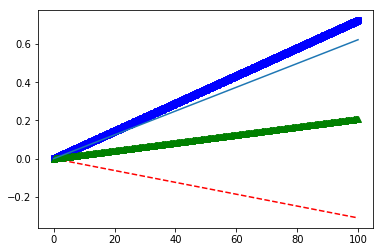

In [354]:
xx = np.linspace(0, 100, 500)
yp = pp[0]*xx
ys = ps[0]*xx
yb =  pb[0]*xx
allplot = yp+ys+yb
nevadapopulation = [3034000] *500
plt.plot(xx, yp, 'r--', xx, ys, 'bs', xx, yb, 'g^', xx, allplot, label='least squares fit, $y = a + bx^2$')

In [356]:
print(ps, pb, pp)

[ 0.00724218  0.02656627 -0.00203283 -0.00388169] [ 0.00208105  0.00828565  0.00026475 -0.00173397] [-0.00310091  0.01995075  0.00205471 -0.00309482]
